In [247]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [248]:
df_trec = pd.read_parquet("../../../data/metadata_TREC.parquet")
df_ceur = pd.read_parquet("../../../data/metadata_CEUR.parquet")
df_lncs = pd.read_parquet("../../../data/metadata_LNCS.parquet")
df_lncs.loc[df_lncs['ID'] == "lncs_649", 'Section'] = "CLEF at SemEval 2007"

In [249]:
file_name = "../../../data/CEUR_Overview_titles.txt"

overview_paper_ceur = []

# Read file with the titles of CEUR Overview paper
with open(file_name, 'r', encoding='utf-8') as file:
    overview_paper_ceur = [line.strip() for line in file]

In [250]:
# Assign Overview and Participant label to the CEUR documents

overview_participant_classification = []
for i , j in df_ceur.iterrows():
    if j["Title"] in overview_paper_ceur:
        overview_participant_classification.append("Overview")
    else:
        overview_participant_classification.append("Participant")

In [251]:
len(df_trec[df_trec["PubYear"] == 2022])

50

In [252]:
df_ceur["Classification"] = overview_participant_classification

In [253]:
# Define concordance dict for classifiying TREC documents based on the headers given in DBLP and unify them to Participant or Overview

concordance_dict_trec_overview = {}
concordance_dict_trec_overview["Participant"] = ["Papers", "Participant", "Other Papers", "Participant Papers", "Uncategorized"]
concordance_dict_trec_overview["Overview"] = ["Track Overviews", "Overview Papers", "Overview"]

In [254]:
def replace_values(val):
    for key, value_list in concordance_dict_trec_overview.items():
        if val in value_list:
            return key
    return val

# Apply the concordance dict on TREC
df_trec['Classification'] = df_trec['Section'].apply(replace_values)

In [255]:
file_name = "../../../data/TREC_Overview_titles.txt"

overview_paper_trec = []

# Read file with the titles of TREC Overview paper
with open(file_name, 'r', encoding='utf-8') as file:
    overview_paper_trec = [line.strip() for line in file]

In [256]:
# Assign Overview and Participant label to the TREC documents

df_trec.loc[df_trec['Title'].isin(overview_paper_trec), 'Classification'] = 'Overview'    

In [257]:
# Define concordance dict for classifiying LNCS documents based on the headers given on the Springer website and unify them to Participant or Overview

concordance_dict_lncs_overview = {}
concordance_dict_lncs_overview["Overview"] = ["Overview", "Overviews", "CLEF Lab Overviews", "Lab Overviews", "Labs Overviews" ,"CLEF 2018 Lab Overviews", "Overviews  of 2022 Labs", "CLEF 2020 Lab Overviews", "Overviews 2021 Labs", "Lab Overviews","CLEF 2019 Lab Overviews","CLEF 2016 Labs Overviews"]

In [258]:
# Apply the concordance dict on TREC

def categorize(row):
    for key, values in concordance_dict_lncs_overview.items():
        if row['Section'] in values or row['Subsection'] in values:
            return key
    return 'Participant'

df_lncs['Classification'] = df_lncs.apply(categorize, axis=1)

In [259]:
file_name = "../../../data/LNCS_Overview_titles.txt"

overview_paper_lncs = []

# Read file with the titles of LNCS Overview paper
with open(file_name, 'r', encoding='utf-8') as file:
    overview_paper_lncs = [line.strip() for line in file]

In [260]:
# Assign Overview and Participant label to the LNCS documents by title 

for i, j in df_lncs.iterrows():
    if j["Title"] in overview_paper_lncs:
        df_lncs.loc[i, 'Classification'] = 'Overview'

In [261]:
import json
def add_SemanticCitations(df, path):
    with open(path, 'r', encoding="utf-8") as file:
        SemanticCitations = json.load(file)
    
    citations_semantic = []
    for i in SemanticCitations:
        try:
            citations_semantic.append([i, SemanticCitations[i]["citationCount"]])
        except:
            print(i)
    df_citations = pd.DataFrame(citations_semantic, columns=["ID", "Citations_semantic"])
    merge = pd.merge(df, df_citations, how="left" , left_on = "ID", right_on="ID")
    return merge

In [262]:
df_lncs = add_SemanticCitations(df_lncs, "../../../data/SemanticScholar_LNCS_additional_metadata.json")
df_trec = add_SemanticCitations(df_trec, "../../../data/SemanticScholar_TREC_additional_metadata.json")
df_ceur = add_SemanticCitations(df_ceur, "../../../data/SemanticScholar_CEUR_additional_metadata.json")

In [263]:
import json
def add_OpenAlexCitations(df, path):
    with open(path, 'r', encoding="utf-8") as file:
        OpenAlexCitations = json.load(file)
    
    citations_OpenAlex = []
    for i in OpenAlexCitations:
        try:
            citations_OpenAlex.append([i, OpenAlexCitations[i]["cited_by_count"]])
        except:
            print(i)
    df_citations = pd.DataFrame(citations_OpenAlex, columns=["ID", "Citations_OpenAlex"])
    merge = pd.merge(df, df_citations, how="left" , left_on = "ID", right_on="ID")
    return merge

In [264]:
df_lncs = add_OpenAlexCitations(df_lncs, "../../../data/OpenAlex_LNCS.json")
df_trec = add_OpenAlexCitations(df_trec, "../../../data/OpenAlex_TREC.json")
df_ceur = add_OpenAlexCitations(df_ceur, "../../../data/OpenAlex_CEUR.json")

In [265]:
df_ceur

,PubYear,CEUR Title,Volume,filename,Title,Section,Authors,url,ID,Classification,Citations_semantic,Citations_OpenAlex
0,2016,Working Notes of CLEF 2016 - Conference and La...,Vol-1609,16090001.pdf,Task 1 of the CLEF eHealth Evaluation Lab 2016...,CLEFeHealth,"[Hanna Suominen, Liyuan Zhou, Lorraine Goeurio...",https://ceur-ws.org/Vol-1609/16090001.pdf,ceur_1019,Overview,21.0,7.0
1,2016,Working Notes of CLEF 2016 - Conference and La...,Vol-1609,16090015.pdf,The IR Task at the CLEF eHealth Evaluation Lab...,CLEFeHealth,"[Guido Zuccon, Joao Palotti, Lorraine Goeuriot...",https://ceur-ws.org/Vol-1609/16090015.pdf,ceur_1020,Overview,56.0,NaN
2,2016,Working Notes of CLEF 2016 - Conference and La...,Vol-1609,16090028.pdf,Clinical Information Extraction at the CLEF eH...,CLEFeHealth,"[Aurélie Névéol, Kevin Bretonnel Cohen, Cyril ...",https://ceur-ws.org/Vol-1609/16090028.pdf,ceur_1021,Overview,70.0,24.0
3,2016,Working Notes of CLEF 2016 - Conference and La...,Vol-1609,16090043.pdf,Comparison of Several Word embedding Sources f...,CLEFeHealth,"[Julie Budaher, Mohannad Almasri, Lorraine Goe...",https://ceur-ws.org/Vol-1609/16090043.pdf,ceur_1022,Participant,4.0,0.0
4,2016,Working Notes of CLEF 2016 - Conference and La...,Vol-1609,16090047.pdf,SIBM at CLEF eHealth Evaluation Lab 2016: Extr...,CLEFeHealth,"[Chloé Cabot, Lina F. Soualmia, Badisse Dahamn...",https://ceur-ws.org/Vol-1609/16090047.pdf,ceur_1023,Participant,25.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3212,2022,Proceedings of the Working Notes of CLEF 2022 ...,Vol-3180,paper-261.pdf,Quality-Aware Argument Re-Ranking for Comparat...,Touché: Argument Retrieval,"[Niclas Arnhold, Philipp Rösner, Tobias Xylander]",https://ceur-ws.org/Vol-3180/paper-261.pdf,ceur_3328,Participant,2.0,NaN
3213,2022,Proceedings of the Working Notes of CLEF 2022 ...,Vol-3180,paper-262.pdf,The Pearl Retriever: Two-Stage Retrieval for P...,Touché: Argument Retrieval,"[Sebastian Schmidt, Jonas Probst, Bianca Barte...",https://ceur-ws.org/Vol-3180/paper-262.pdf,ceur_3329,Participant,1.0,NaN
3214,2022,Proceedings of the Working Notes of CLEF 2022 ...,Vol-3180,paper-263.pdf,Touché - Task 1 - Team Korg: Finding pairs of ...,Touché: Argument Retrieval,"[Cuong Vo Ta, Florian Reiner, Immanuel von Det...",https://ceur-ws.org/Vol-3180/paper-263.pdf,ceur_3330,Participant,1.0,NaN
3215,2022,Proceedings of the Working Notes of CLEF 2022 ...,Vol-3180,paper-264.pdf,Using BERT to retrieve relevant and argumentat...,Touché: Argument Retrieval,"[Nils Wenzlitschke, Pia Sülzle]",https://ceur-ws.org/Vol-3180/paper-264.pdf,ceur_3331,Participant,2.0,NaN


In [30]:
len(df_lncs)

1225

In [31]:
filtered_df = df_lncs[df_lncs['Classification'].isin(['Overview', 'Participant'])]

# Group by year and classification and count occurrences
count_df_lncs = filtered_df.groupby(['PubYear', 'Classification']).size().unstack(fill_value=0)

print(count_df_lncs)

Classification  Overview  Participant
PubYear                              
2000                   1           25
2001                   2           34
2002                   3           40
2003                   5           56
2004                   6           74
2005                   8          103
2006                   2          123
2007                  13          102
2008                  16          114
2009                  18          113
2010                   0           16
2011                   0           16
2012                   0           17
2013                  10           22
2014                   8           16
2015                   8           43
2016                   7           23
2017                  10           22
2018                  10           22
2019                   9           23
2020                  12           14
2021                  12           16
2022                  14           17


In [32]:
filtered_df = df_ceur[df_ceur['Classification'].isin(['Overview', 'Participant'])]

# Group by year and classification and count occurrences
count_df_ceur = filtered_df.groupby(['PubYear', 'Classification']).size().unstack(fill_value=0)

print(count_df_ceur)

Classification  Overview  Participant
PubYear                              
2000                   0           19
2001                   1           36
2002                   1           39
2003                   4           54
2004                   4           75
2005                   8          115
2006                  10          127
2007                  14          117
2008                  14          147
2009                  17          149
2010                  12          110
2011                  13           93
2012                  21          166
2013                  17          191
2014                  21          139
2015                  19          153
2016                  16          109
2017                  19          132
2018                  19          132
2019                  19          166
2020                  26          189
2021                  26          193
2022                  32          233


In [33]:
filtered_df = df_trec[df_trec['Classification'].isin(['Overview', 'Participant'])]

# Group by year and classification and count occurrences
count_df_trec = filtered_df.groupby(['PubYear', 'Classification']).size().unstack(fill_value=0)

print(count_df_trec)

Classification  Overview  Participant
PubYear                              
2000                   7           66
2001                   7           78
2002                   8           93
2003                   7           93
2004                   8           97
2005                   8          125
2006                   8          113
2007                   8           98
2008                   5           56
2009                   6           71
2010                   6           61
2011                   6          119
2012                   7           89
2013                   8           65
2014                   8           78
2015                   8           79
2016                   7           68
2017                   8           58
2018                   5           52
2019                   7           72
2020                   8           74
2021                   6           61
2022                   5           45


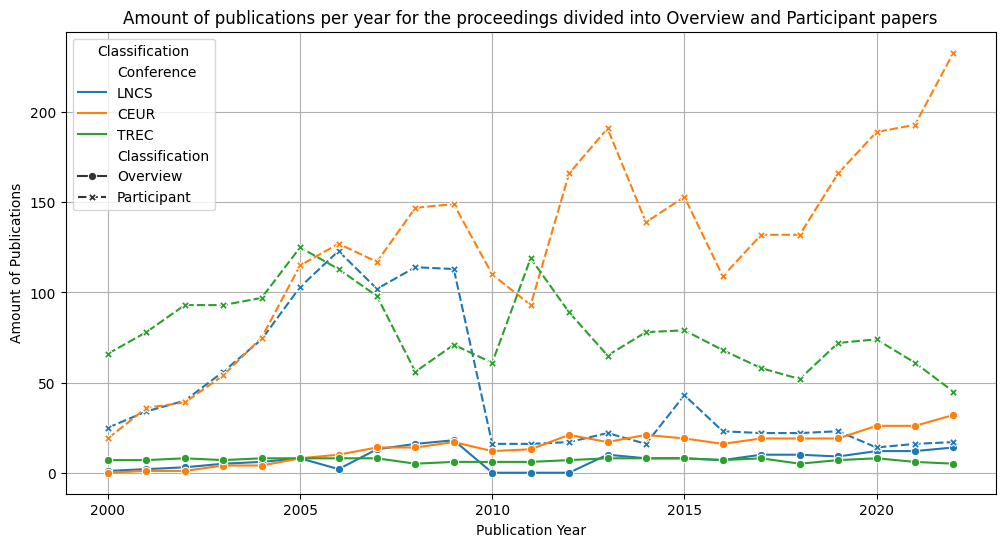

In [54]:
count_df_lncs = df_lncs[df_lncs['Classification'].isin(['Overview', 'Participant'])].groupby(['PubYear', 'Classification']).size().unstack(fill_value=0)
count_df_ceur = df_ceur[df_ceur['Classification'].isin(['Overview', 'Participant'])].groupby(['PubYear', 'Classification']).size().unstack(fill_value=0)
count_df_trec = df_trec[df_trec['Classification'].isin(['Overview', 'Participant'])].groupby(['PubYear', 'Classification']).size().unstack(fill_value=0)

# Add column for corresponding proceeding
count_df_lncs['Conference'] = 'LNCS'
count_df_ceur['Conference'] = 'CEUR'
count_df_trec['Conference'] = 'TREC'

combined_df = pd.concat([count_df_lncs, count_df_ceur, count_df_trec]).reset_index()

combined_df['PubYear'] = combined_df['PubYear'].astype(int)


melted_df = pd.melt(combined_df, id_vars=['PubYear', 'Conference'], value_vars=['Overview', 'Participant'], var_name='Classification', value_name='Count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_df, x='PubYear', y='Count', hue='Conference', style='Classification', markers=True )
plt.title('Amount of publications per year for the proceedings divided into Overview and Participant papers')
plt.xlabel('Publication Year')
plt.ylabel('Amount of Publications')
plt.legend(title='Classification')
plt.grid(True)
plt.savefig('../../../images/amount_part_over_year_lineshart.png', dpi=300)  # Save the figure as a PNG file with 300 dpi

plt.show()

In [53]:
def calculate_avg_citations(df):
    
    # Filter the rows based on the values “Overview” and “Participant”    
    filtered_df = df[df['Classification'].isin(['Overview', 'Participant'])]
    filtered_df = filtered_df.dropna(subset=["Citations_semantic"])
    # Calculate the average number of citations per year and classification
    avg_citations_per_year_classification = filtered_df.groupby(['PubYear', 'Classification'])['Citations_semantic'].mean().reset_index()
    avg_citations_per_year_classification.rename(columns={'Citations_semantic': 'AvgCitations_semantic'}, inplace=True)
    
    return avg_citations_per_year_classification

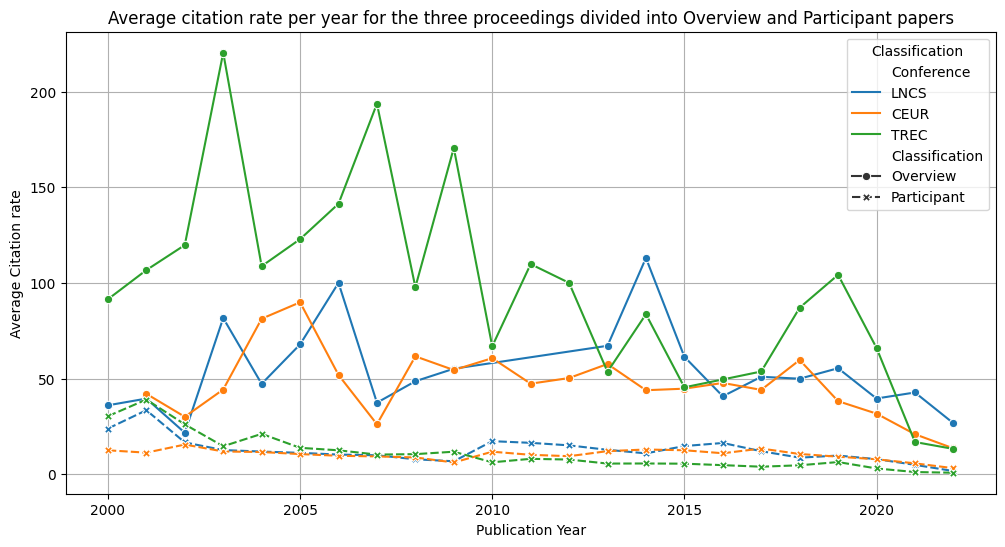

In [56]:
avg_citations_conf1 = calculate_avg_citations(df_lncs)
avg_citations_conf2 = calculate_avg_citations(df_ceur)
avg_citations_conf3 = calculate_avg_citations(df_trec)

# Add a column for the conference
avg_citations_conf1['Conference'] = 'LNCS'
avg_citations_conf2['Conference'] = 'CEUR'
avg_citations_conf3['Conference'] = 'TREC'

combined_df = pd.concat([avg_citations_conf1, avg_citations_conf2, avg_citations_conf3])

combined_df['PubYear'] = combined_df['PubYear'].astype(int)
combined_df['Classification'] = combined_df['Classification'].astype(str)
combined_df['Conference'] = combined_df['Conference'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x='PubYear', y='AvgCitations_semantic', hue='Conference', style='Classification', markers=True)
plt.title('Average citation rate per year for the three proceedings divided into Overview and Participant papers')
plt.xlabel('Publication Year')
plt.ylabel('Average Citation rate')
plt.legend(title='Classification')
plt.grid(True)
plt.savefig('../../../images/avg_cit_lineshart.png', dpi=300)  # Save the figure as a PNG file with 300 dpi

plt.show()

PubYear        int32
HIndex         int64
Conference    object
dtype: object
PubYear        int32
HIndex         int64
Conference    object
dtype: object


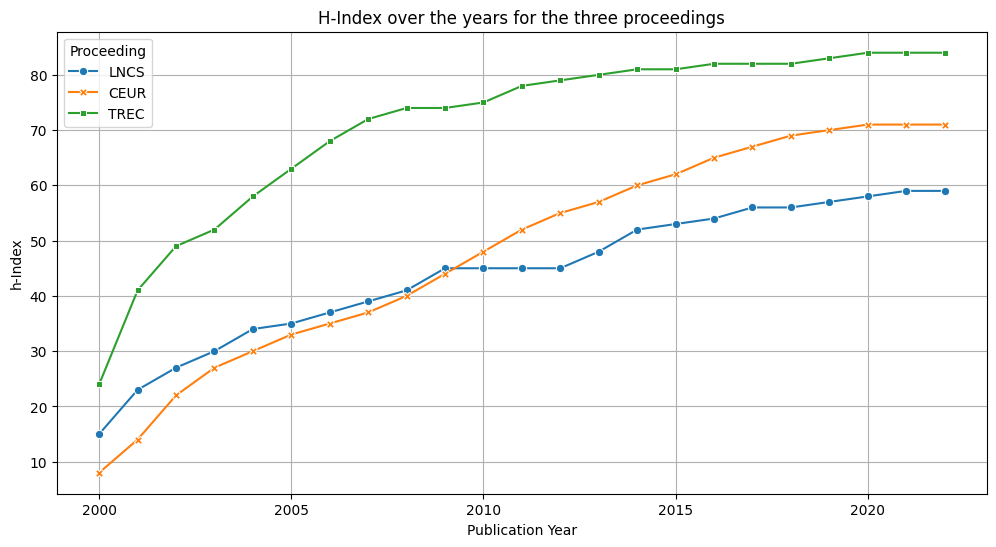

In [58]:
import pandas as pd

def calculate_h_index(citations):
    citations = sorted(citations, reverse=True)
    h_index = 0
    for i, citation in enumerate(citations):
        if citation >= i + 1:
            h_index = i + 1
        else:
            break
    return h_index

# Function for calculating the h-index retroactively over the years
def calculate_h_index_cumulative(df):
    filtered_df = df[df['Classification'].isin(['Overview', 'Participant'])]
    filtered_df = filtered_df.dropna(subset=["Citations_semantic"])

    # List for cumulated h-index values
    h_index_cumulative = []

 # Sort the years to make sure we are accumulating correctly
    years = sorted(filtered_df['PubYear'].unique())

    for year in years:
        # Filter data up to and including the current year
        cumulative_df = filtered_df[filtered_df['PubYear'] <= year]
        
        # Calculation of the h-index for the cumulative data
        h_index = calculate_h_index(cumulative_df['Citations_semantic'])
        
        h_index_cumulative.append({'PubYear': year, 'HIndex': h_index})
    
    return pd.DataFrame(h_index_cumulative)

# Calculate the cumulative h-index for each conference
h_index_conf1 = calculate_h_index_cumulative(df_lncs)
h_index_conf2 = calculate_h_index_cumulative(df_ceur)
h_index_conf3 = calculate_h_index_cumulative(df_trec)

# Add a column for the conference
h_index_conf1['Conference'] = 'LNCS'
h_index_conf2['Conference'] = 'CEUR'
h_index_conf3['Conference'] = 'TREC'

combined_df = pd.concat([h_index_conf1, h_index_conf2, h_index_conf3])

combined_df['PubYear'] = combined_df['PubYear'].astype(int)
combined_df['Conference'] = combined_df['Conference'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x='PubYear', y='HIndex', style='Conference',  hue='Conference', markers=True, dashes=False)
plt.title('H-Index over the years for the three proceedings')
plt.xlabel('Publication Year')
plt.ylabel('h-Index')
plt.legend(title='Proceeding')
plt.grid(True)
plt.savefig('../../../images/hindex_per_year_part_over_lineshart_new.png', dpi=300)  # Save the figure as a PNG file with 300 dpi

plt.show()

PubYear        int32
HIndex         int64
Conference    object
dtype: object


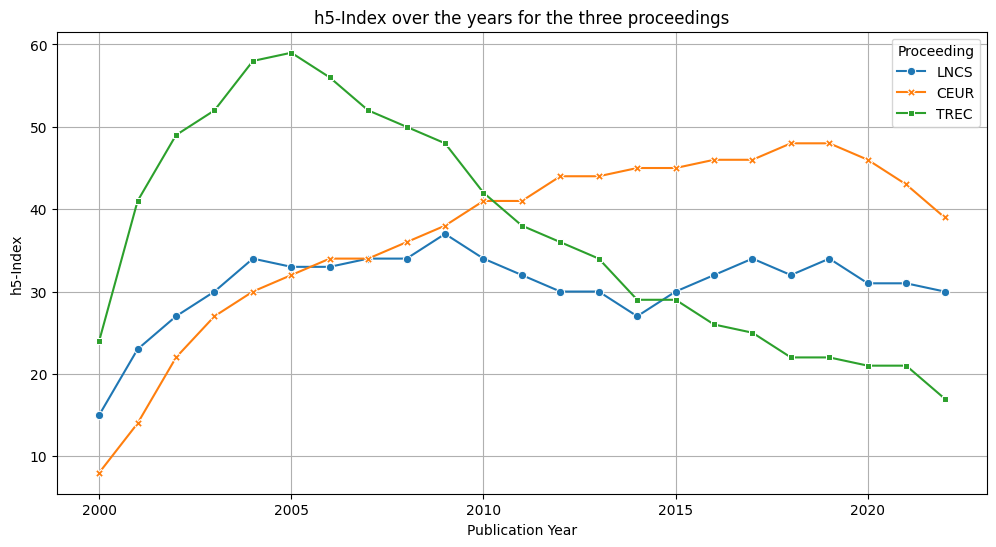

In [59]:
import pandas as pd

def calculate_h_index(citations):
    citations = sorted(citations, reverse=True)
    h_index = 0
    for i, citation in enumerate(citations):
        if citation >= i + 1:
            h_index = i + 1
        else:
            break
    return h_index

# Function for calculating the h5 index (only takes into account the last 5 years)
def calculate_h5_index(df):
    filtered_df = df[df['Classification'].isin(['Overview', 'Participant'])]
    filtered_df = filtered_df.dropna(subset=["Citations_semantic"])

    # List for h5 index values
    h5_index_per_year = []

    # Sort the years to make sure we accumulate correctly
    years = sorted(filtered_df['PubYear'].unique())

    for year in years:
        # Filter data for the last 5 years
        start_year = max(year - 4, min(years))
        h5_df = filtered_df[(filtered_df['PubYear'] >= start_year) & (filtered_df['PubYear'] <= year)]
        
        # Calculation of the h5 index for the filtered data
        h5_index = calculate_h_index(h5_df['Citations_semantic'])
        
        h5_index_per_year.append({'PubYear': year, 'HIndex': h5_index})
    
    return pd.DataFrame(h5_index_per_year)

df_lncs['PubYear'] = df_lncs['PubYear'].astype(int)
df_ceur['PubYear'] = df_ceur['PubYear'].astype(int)
df_trec['PubYear'] = df_trec['PubYear'].astype(int)


# Calculate the h5 index for each conference
h5_index_conf1 = calculate_h5_index(df_lncs)
h5_index_conf2 = calculate_h5_index(df_ceur)
h5_index_conf3 = calculate_h5_index(df_trec)

# Calculate the h5 index for each conference
h5_index_conf1['Conference'] = 'LNCS'
h5_index_conf2['Conference'] = 'CEUR'
h5_index_conf3['Conference'] = 'TREC'

combined_h5_df = pd.concat([h5_index_conf1, h5_index_conf2, h5_index_conf3])

combined_h5_df['PubYear'] = combined_h5_df['PubYear'].astype(int)
combined_h5_df['Conference'] = combined_h5_df['Conference'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_h5_df, x='PubYear', y='HIndex', style='Conference', hue='Conference', markers=True, dashes=False)
plt.title('h5-Index over the years for the three proceedings')
plt.xlabel('Publication Year')
plt.ylabel('h5-Index')
plt.legend(title='Proceeding')
plt.grid(True)
plt.savefig('../../../images/h5index_per_year_part_over_lineshart.png', dpi=300)  # Save the figure as a PNG file with 300 dpi

plt.show()


# Top 10 overall most successfull papers for TREC, CEUR and LNCS

## CEUR

In [60]:
df_ceur_top10 = df_ceur.dropna()

In [61]:
def calculate_rank_for_top_10(df, proceeding):
    
    df_sorted = df.sort_values(by='Citations_OpenAlex', ascending=False)
    df_sorted['Rank OpenAlex'] = range(1, len(df_sorted) + 1)
    if proceeding == "LNCS":
        df_sorted = df_sorted.sort_values(by='Citation count', ascending=False)
        df_sorted['Rank Springer'] = range(1, len(df_sorted) + 1)
    
    df_sorted = df_sorted.sort_values(by='Citations_semantic', ascending=False)
    df_sorted['Rank Semantic'] = range(1, len(df_sorted) + 1)
    
    
    return df_sorted[:10]

In [62]:
top10 = calculate_rank_for_top_10(df_ceur_top10, "CEUR")

In [63]:
top10

,PubYear,CEUR Title,Volume,filename,Title,Section,Authors,url,ID,Classification,Citations_semantic,Citations_OpenAlex,Rank OpenAlex,Rank Semantic
595,2005,Working Notes for CLEF 2005 Workshop,Vol-1171,CLEF2005wn-ImageCLEF-CloughEt2005.pdf,The CLEF 2005 Cross-Language Image Retrieval T...,Cross-Language Retrieval in Image Collections,"[Paul Clough, Henning Müller, Thomas Deselaers...",https://ceur-ws.org/Vol-1171/CLEF2005wn-ImageC...,ceur_2500,Overview,222.0,93.0,2,1
71,2016,Working Notes of CLEF 2016 - Conference and La...,Vol-1609,16090750.pdf,Overview of the 4th Author Profiling Task at P...,Digital Text Forensics (PAN),"[Francisco Manuel Rangel Pardo, Paolo Rosso, B...",https://ceur-ws.org/Vol-1609/16090750.pdf,ceur_1090,Overview,207.0,39.0,37,2
1633,2017,Working Notes of CLEF 2017 - Conference and La...,Vol-1866,invited_paper_11.pdf,Overview of the 5th Author Profiling Task at P...,PAN Lab on Digital Text Forensics,"[Francisco Manuel Rangel Pardo, Paolo Rosso, M...",https://ceur-ws.org/Vol-1866/invited_paper_11.pdf,ceur_892,Overview,202.0,48.0,20,3
1485,2015,Working Notes of CLEF 2015 - Conference and La...,Vol-1391,121-CR.pdf,Fine-tuning Deep Convolutional Networks for Pl...,LifeCLEF,"[Angie K. Reyes, Juan C. Caicedo, Jorge E. Cam...",https://ceur-ws.org/Vol-1391/121-CR.pdf,ceur_2905,Participant,200.0,74.0,6,4
2392,2009,Working Notes for CLEF 2009 Workshop,Vol-1175,CLEF2009wn-ImageCLEF-MullerEt2009.pdf,Overview of the CLEF 2009 Medical Image Retrie...,Cross-Language Retrieval in Image Collections,"[Henning Müller, Jayashree Kalpathy-Cramer, Iv...",https://ceur-ws.org/Vol-1175/CLEF2009wn-ImageC...,ceur_1367,Overview,184.0,112.0,1,5
834,2018,Working Notes of CLEF 2018 - Conference and La...,Vol-2125,invited_paper_1.pdf,Overview of eRisk: Early Risk Prediction on th...,Early Risk Prediction on the Internet,"[David Losada, Fabio Crestani, Javier Parapar]",https://ceur-ws.org/Vol-2125/invited_paper_1.pdf,ceur_661,Overview,171.0,1.0,1979,6
980,2014,Working Notes for CLEF 2014 Conference,Vol-1180,CLEF2014wn-QA-UngerEt2014.pdf,Question Answering over Linked Data (QALD-4),Question Answering Track,"[Christina Unger, Corina Forascu, Vanessa Lope...",https://ceur-ws.org/Vol-1180/CLEF2014wn-QA-Ung...,ceur_3457,Overview,171.0,42.0,34,7
557,2004,Working Notes for CLEF 2004 Workshop,Vol-1170,CLEF2004wn-QACLEF-MagniniEt2004.pdf,Overview of the CLEF 2004 Multilingual Questio...,Multiple Language Question Answering,"[Bernardo Magnini, Alessandro Vallin, Christel...",https://ceur-ws.org/Vol-1170/CLEF2004wn-QACLEF...,ceur_2190,Overview,168.0,90.0,3,8
1813,2008,Working Notes for CLEF 2008 Workshop,Vol-1174,CLEF2008wn-ImageCLEF-ArniEt2008.pdf,Overview of the ImageCLEFphoto 2008 Photograph...,Cross-Language Retrieval in Image Collections,"[Thomas Arni, Paul Clough, Mark Sanderson, Mic...",https://ceur-ws.org/Vol-1174/CLEF2008wn-ImageC...,ceur_1988,Overview,159.0,66.0,7,9
1634,2017,Working Notes of CLEF 2017 - Conference and La...,Vol-1866,invited_paper_3.pdf,Overview of the Author Identification Task at ...,PAN Lab on Digital Text Forensics,"[Michael Tschuggnall, Efstathios Stamatatos, B...",https://ceur-ws.org/Vol-1866/invited_paper_3.pdf,ceur_893,Overview,157.0,10.0,306,10


In [64]:
top10 = top10.dropna()
for i, j in top10.iterrows():        
    print(j["Rank Semantic"] , j["Rank OpenAlex"] , "&", int(j["Citations_semantic"]), " ", int(j["Citations_OpenAlex"]), "&" , j["Title"], "&" ,j["PubYear"], "&" , j["Classification"][0] , "\\\\")

1 2 & 222   93 & The CLEF 2005 Cross-Language Image Retrieval Track & 2005 & O \\
2 37 & 207   39 & Overview of the 4th Author Profiling Task at PAN 2016: Cross-Genre Evaluations & 2016 & O \\
3 20 & 202   48 & Overview of the 5th Author Profiling Task at PAN 2017: Gender and Language Variety Identification in Twitter & 2017 & O \\
4 6 & 200   74 & Fine-tuning Deep Convolutional Networks for Plant Recognition & 2015 & P \\
5 1 & 184   112 & Overview of the CLEF 2009 Medical Image Retrieval Track & 2009 & O \\
6 1979 & 171   1 & Overview of eRisk: Early Risk Prediction on the Internet (Extended Lab Overview) & 2018 & O \\
7 34 & 171   42 & Question Answering over Linked Data (QALD-4) & 2014 & O \\
8 3 & 168   90 & Overview of the CLEF 2004 Multilingual Question Answering Track & 2004 & O \\
9 7 & 159   66 & Overview of the ImageCLEFphoto 2008 Photographic Retrieval Task & 2008 & O \\
10 306 & 157   10 & Overview of the Author Identification Task at PAN-2017: Style Breach Detection and A

## TREC

In [65]:
df_trec_top10 = df_trec.dropna()

In [66]:
top10 = calculate_rank_for_top_10(df_trec_top10, "TREC")

In [67]:
top10 = top10.dropna()
for i, j in top10.iterrows():        
    print(j["Rank Semantic"] , j["Rank OpenAlex"] , "&", int(j["Citations_semantic"]), " ", int(j["Citations_OpenAlex"]), "&" , j["Title"], "&" ,j["PubYear"], "&" , j["Classification"][0] , "\\\\")

1 1 & 706   244 & Overview of the TREC 2003 Question Answering Track. & 2003 & O \\
2 15 & 400   121 & Overview of the TREC 2009 Web Track. & 2009 & O \\
3 7 & 383   169 & Overview of the TREC 2005 Enterprise Track. & 2005 & O \\
4 5 & 333   177 & FALCON: Boosting Knowledge for Answer Engines. & 2000 & P \\
5 6 & 329   172 & Data-Intensive Question Answering. & 2001 & P \\
6 9 & 313   164 & Question Answering in Webclopedia. & 2000 & P \\
7 4 & 300   205 & UMass at TREC 2004: Novelty and HARD. & 2004 & P \\
8 12 & 287   127 & Overview of the TREC 2006 Blog Track. & 2006 & O \\
9 10 & 271   131 & Experiments Using the Lemur Toolkit. & 2001 & P \\
10 21 & 252   93 & The TREC 2002 Filtering Track Report. & 2002 & O \\


## LNCS

In [69]:
df_lncs_top10 = df_lncs.dropna()

In [70]:
top10 = calculate_rank_for_top_10(df_trec_top10, "LNCS")

In [71]:
top10 = top10.dropna()
for i, j in top10.iterrows():        
    print(j["Rank Semantic"] , j["Rank OpenAlex"] , "&", int(j["Citations_semantic"]), " ", int(j["Citations_OpenAlex"]), "&" , j["Title"], "&" ,j["PubYear"], "&" , j["Classification"][0] , "\\\\")

1 1 & 491   259 & The Philosophy of Information Retrieval Evaluation & 2001 & P \\
2 11 & 319   85 & Overview of the ShARe/CLEF eHealth Evaluation Lab 2014 & 2014 & O \\
3 3 & 235   153 & A Test Collection for Research on Depression and Language Use & 2016 & P \\
4 62 & 222   38 & The CLEF 2003 Cross Language Image Retrieval Track & 2003 & O \\
5 8 & 222   93 & The CLEF 2005 Cross–Language Image Retrieval Track & 2005 & O \\
6 105 & 188   25 & Improving the Reproducibility of PAN’s Shared Tasks: & 2014 & O \\
7 5 & 184   112 & Overview of the CLEF 2009 Medical Image Retrieval Track & 2009 & O \\
8 19 & 175   66 & LifeCLEF 2015: Multimedia Life Species Identification Challenges & 2015 & O \\
9 6 & 171   108 & Overview of eRisk: Early Risk Prediction on the Internet & 2018 & O \\
10 10 & 168   89 & Overview of the CLEF 2004 Multilingual Question Answering Track & 2004 & O \\


# Identify the countries and institutions with the most contributions in the three proceedings

In [72]:
# ISO file containts the translation of country abbreviations to counter names

with open("../../../data/iso3166-1.json", 'r', encoding="utf-8") as file:
    Country_codes = json.load(file)


country_codes_new = {}
for i in Country_codes["3166-1"]:
    country_codes_new[i["alpha_2"]] = i["name"]

In [73]:
def calculate_most_active_countries_institutions(country_codes_dict,df,path):
    with open(path, 'r', encoding="utf-8") as file:
        OpenAlexJson = json.load(file)

    liste_countries = []
    for i in OpenAlexJson:
        country_codes = []
        institutions = []
        for j in OpenAlexJson[i]["authorships"]:
            for k in j["institutions"]:
                if k["country_code"] is not None:
                    if country_codes_dict[k["country_code"]] not in country_codes:
                        country_codes.append(country_codes_dict[k["country_code"]])
                if k["display_name"] is not None:
                    if k["display_name"] not in institutions:
                        institutions.append(k["display_name"])
        liste_countries.append([i, country_codes, institutions])

    df_countries = pd.DataFrame(liste_countries, columns=["ID", "Countries", "Institutions"])
    df = pd.merge(df, df_countries, how ="left", right_on="ID",left_on="ID")
    return df


## CEUR

In [74]:
df_ceur_contributions = calculate_most_active_countries_institutions(country_codes_new, df_ceur, path="../../../data/OpenAlex_CEUR.json" )

In [77]:
df_exploded1 = df_ceur_contributions.explode('Countries')
df_exploded2 = df_ceur_contributions.explode('Institutions')

In [84]:
# Count the amount of Country appearances
counts_countries = df_exploded1['Countries'].value_counts()

# Count the amount of Institutions appearances
counts_institutions= df_exploded2['Institutions'].value_counts()

In [86]:
top_10_countries = counts_countries.head(10).reset_index()
top_10_countries.columns = ['Country', 'Amount of Contributions']

top_10_institutions = counts_institutions.head(10).reset_index()
top_10_institutions.columns = ['Institution', 'Amount of Contributions']

In [87]:
result_df = pd.concat([top_10_countries, top_10_institutions], axis=1)


In [88]:
result_df

,Country,Amount of Contributions,Institution,Amount of Contributions
0,Spain,187,National University of Distance Education,46
1,United States,183,Dublin City University,45
2,France,167,University of Amsterdam,43
3,Germany,138,University of Alicante,35
4,Netherlands,93,"University of California, Berkeley",29
5,United Kingdom,88,University of Hildesheim,28
6,Switzerland,73,University of Sheffield,26
7,Italy,64,Laboratoire d'Informatique pour la Mécanique e...,24
8,Ireland,63,Alexandru Ioan Cuza University,23
9,Australia,39,University of Padua,21


In [89]:
latex_table = result_df.to_latex(index=False, caption='My table', label='tab:my_table', column_format='|c|c|c|c|', escape=False)


# TREC

In [94]:
df_trec_contributions = calculate_most_active_countries_institutions(country_codes_new, df_trec, path="../../../data/OpenAlex_TREC.json" )

In [95]:
df_exploded1 = df_trec_contributions.explode('Countries')
df_exploded2 = df_trec_contributions.explode('Institutions')

In [96]:
# Count the amount of Country appearances
counts_countries = df_exploded1['Countries'].value_counts()

# Count the amount of Institutions appearances
counts_institutions= df_exploded2['Institutions'].value_counts()

In [97]:
top_10_countries = counts_countries.head(10).reset_index()
top_10_countries.columns = ['Country', 'Amount of Contributions']

top_10_institutions = counts_institutions.head(10).reset_index()
top_10_institutions.columns = ['Institution', 'Amount of Contributions']

In [98]:
result_df = pd.concat([top_10_countries, top_10_institutions], axis=1)


In [99]:
result_df

,Country,Amount of Contributions,Institution,Amount of Contributions
0,United States,432,University of Waterloo,63
1,China,178,University of Amsterdam,49
2,Canada,114,University of Delaware,45
3,United Kingdom,94,Microsoft (United States),43
4,Netherlands,78,National Institute of Standards and Technology,40
5,Australia,51,University of Glasgow,39
6,Germany,46,Chinese Academy of Sciences,38
7,France,45,Carnegie Mellon University,34
8,Italy,40,"University of Maryland, College Park",28
9,Switzerland,33,RMIT University,22


In [100]:
latex_table = result_df.to_latex(index=False, caption='My table', label='tab:my_table', column_format='|c|c|c|c|', escape=False)


## LNCS

In [102]:
df_lncs_contributions = calculate_most_active_countries_institutions(country_codes_new, df_lncs, path="../../../data/OpenAlex_LNCS.json" )

In [109]:
df_exploded1 = df_lncs_contributions.explode('Countries')
df_exploded2 = df_lncs_contributions.explode('Institutions')

In [110]:
# Count the amount of Country appearances
counts_countries = df_exploded1['Countries'].value_counts()

# Count the amount of Institutions appearances
counts_institutions= df_exploded2['Institutions'].value_counts()

In [111]:
top_10_countries = counts_countries.head(10).reset_index()
top_10_countries.columns = ['Country', 'Amount of Contributions']

top_10_institutions = counts_institutions.head(10).reset_index()
top_10_institutions.columns = ['Institution', 'Amount of Contributions']

In [112]:
result_df = pd.concat([top_10_countries, top_10_institutions], axis=1)


In [113]:
result_df

,Country,Amount of Contributions,Institution,Amount of Contributions
0,Spain,237,University of Amsterdam,55
1,Germany,184,Dublin City University,46
2,United States,153,University of Alicante,46
3,France,119,National University of Distance Education,43
4,United Kingdom,117,Universitat Politècnica de València,37
5,Netherlands,104,University of Padua,36
6,Switzerland,103,University of Sheffield,35
7,Italy,95,Universidad de Jaén,29
8,Ireland,67,University of Hildesheim,29
9,Austria,44,Centre National de la Recherche Scientifique,29


In [114]:
latex_table = result_df.to_latex(index=False, caption='My table', label='tab:my_table', column_format='|c|c|c|c|', escape=False)


# Caculcate Spearman Rank correlation for comparison of OpenAlex and SemanticScholar

In [115]:
from scipy.stats import spearmanr


In [120]:
def calculate_spearman_R(df, proceeding):
    # Sort the DataFrame by 'Citations_OpenAlex' and calculate the ranking
    df_sorted = df.sort_values(by='Citations_OpenAlex', ascending=False)
    df_sorted['Rank OpenAlex'] = range(1, len(df_sorted) + 1)

    # Sort by 'Citations_semantic' and calculate the Semantic Scholar ranking
    df_sorted = df_sorted.sort_values(by='Citations_semantic', ascending=False)
    df_sorted['Rank Semantic'] = range(1, len(df_sorted) + 1)

    # Calculate rankings for different proceedings
    if proceeding == "LNCS":
        # Sort by 'Citation count' and calculate the Springer ranking
        df_sorted = df_sorted.sort_values(by='Citation count', ascending=False)
        df_sorted['Rank Springer'] = range(1, len(df_sorted) + 1)
                
        # Calculate Spearman correlations
        corr_openalex_springer, p_value_openalex_springer = spearmanr(df_sorted['Rank OpenAlex'], df_sorted['Rank Springer'])
        corr_semantic_springer, p_value_semantic_springer = spearmanr(df_sorted['Rank Semantic'], df_sorted['Rank Springer'])
        corr_openalex_semantic, p_value_openalex_semantic = spearmanr(df_sorted['Rank OpenAlex'], df_sorted['Rank Semantic'])
        
        print(f"For LNCS proceeding:")
        print(f"Spearman correlation between OpenAlex and Springer: {corr_openalex_springer:.4f}, p-value: {p_value_openalex_springer:.4f}")
        print(f"Spearman correlation between Semantic Scholar and Springer: {corr_semantic_springer:.4f}, p-value: {p_value_semantic_springer:.4f}")
        print(f"Spearman correlation between OpenAlex and Semantic Scholar: {corr_openalex_semantic:.4f}, p-value: {p_value_openalex_semantic:.4f}")

    elif proceeding in ["CEUR", "TREC"]:

        # Calculate Spearman correlation
        corr_openalex_semantic, p_value_openalex_semantic = spearmanr(df_sorted['Rank OpenAlex'], df_sorted['Rank Semantic'])
        
        print(f"For {proceeding} proceeding:")
        print(f"Spearman correlation between OpenAlex and Semantic Scholar: {corr_openalex_semantic:.4f}, p-value: {p_value_openalex_semantic:.4f}")

In [122]:
corr_lncs, p_value_lncs = calculate_spearman_R(df_lncs, "LNCS")

For LNCS proceeding:
Spearman correlation between OpenAlex and Springer: -0.0102, p-value: 0.7255
Spearman correlation between Semantic Scholar and Springer: -0.0074, p-value: 0.7980
Spearman correlation between OpenAlex and Semantic Scholar: 0.9288, p-value: 0.0000


TypeError: cannot unpack non-iterable NoneType object

In [123]:
corr_trec, p_value_trec = calculate_spearman_R(df_trec, "TREC")

For TREC proceeding:
Spearman correlation between OpenAlex and Semantic Scholar: 0.6271, p-value: 0.0000


TypeError: cannot unpack non-iterable NoneType object

In [124]:
corr_ceur, p_value_ceur = calculate_spearman_R(df_ceur, "CEUR")

For CEUR proceeding:
Spearman correlation between OpenAlex and Semantic Scholar: 0.6157, p-value: 0.0000


TypeError: cannot unpack non-iterable NoneType object

# Identify the most successfull Tracks/Labs based on the average citation cound

## LNCS

In [127]:
# Read concordance dict for Lab abbreviations translation

with open('../../../data/LNCS_abbreviations_headings.json', 'r', encoding="utf-8") as file:
    LNCS_lab_abbreviations = json.load(file)

In [128]:
def find_key(section):
    for key, values in LNCS_lab_abbreviations.items():
        if section in values:
            return key
    return None

# Assign concordance dict to LNCS dataframe
df_lncs['Labs'] = df_lncs['Section'].apply(find_key)

In [129]:
df_lncs

,PubYear,Book Subtitle,Book Title,Filename,Title,Section,Subsection,DOI,Citation count,Authors & Affiliations,ID,Classification,Citations_semantic,Citations_OpenAlex,Labs
0,2005,6th Workshop of the Cross-Language Evaluation ...,Accessing Multilingual Information Repositories,11878773_2.pdf,CLEF 2005: Ad Hoc Track Overview,Part I. Multilingual Textual Document Retrival...,Uncategorized,https://doi.org/10.1007/11878773_2,17,"[['Department of Information Engineering, Univ...",lncs_2,Overview,10.0,22,Adhoc
1,2005,6th Workshop of the Cross-Language Evaluation ...,Accessing Multilingual Information Repositories,11878773_3.pdf,Ad-Hoc Mono- and Bilingual Retrieval Experimen...,Cross-Language and More,Uncategorized,https://doi.org/10.1007/11878773_3,Not found,"[['Information Science, University of Hildeshe...",lncs_3,Participant,6.0,2,Adhoc
2,2005,6th Workshop of the Cross-Language Evaluation ...,Accessing Multilingual Information Repositories,11878773_4.pdf,MIRACLE at Ad-Hoc CLEF 2005: Merging and Combi...,Cross-Language and More,Uncategorized,https://doi.org/10.1007/11878773_4,4,"[['Universidad Politécnica de Madrid, \xa0', [...",lncs_4,Participant,6.0,7,Adhoc
3,2005,6th Workshop of the Cross-Language Evaluation ...,Accessing Multilingual Information Repositories,11878773_5.pdf,The XLDB Group at the CLEF 2005 Ad-Hoc Task,Cross-Language and More,Uncategorized,https://doi.org/10.1007/11878773_5,3,"[['Departamento de Informática, Grupo XLDB, Fa...",lncs_5,Participant,5.0,3,Adhoc
4,2005,6th Workshop of the Cross-Language Evaluation ...,Accessing Multilingual Information Repositories,11878773_6.pdf,Thomson Legal and Regulatory Experiments at CL...,Cross-Language and More,Uncategorized,https://doi.org/10.1007/11878773_6,1,"[['Thomson Legal and Regulatory, 610 Opperman ...",lncs_6,Participant,13.0,9,Adhoc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,2013,4th International Conference of the CLEF Initi...,Information Access Evaluation. Multilinguality...,978-3-642-40802-1_28.pdf,Recent Trends in Digital Text Forensics and It...,Lab Overviews,Uncategorized,https://doi.org/10.1007/978-3-642-40802-1_28,15,"[['Web Technology and Information Systems, Bau...",lncs_1339,Overview,87.0,40,Overview
1221,2013,4th International Conference of the CLEF Initi...,Information Access Evaluation. Multilinguality...,978-3-642-40802-1_29.pdf,QA4MRE 2011-2013: Overview of Question Answeri...,Lab Overviews,Uncategorized,https://doi.org/10.1007/978-3-642-40802-1_29,13,"[['NLP&IR Group, UNED, Spain', ['Anselmo Peñas...",lncs_1340,Overview,41.0,29,Overview
1222,2013,4th International Conference of the CLEF Initi...,Information Access Evaluation. Multilinguality...,978-3-642-40802-1_30.pdf,Multilingual Question Answering over Linked Da...,Lab Overviews,Uncategorized,https://doi.org/10.1007/978-3-642-40802-1_30,36,"[['CITEC, Universität Bielefeld, Germany', ['P...",lncs_1341,Overview,79.0,55,Overview
1223,2013,4th International Conference of the CLEF Initi...,Information Access Evaluation. Multilinguality...,978-3-642-40802-1_31.pdf,Overview of RepLab 2013: Evaluating Online Rep...,Lab Overviews,Uncategorized,https://doi.org/10.1007/978-3-642-40802-1_31,49,"[['UNED NLP and IR Group, Juan del Rosal, 16, ...",lncs_1342,Overview,146.0,101,Overview


In [130]:
def calculate_avg_citations(df, column_name):
        
    # Calculate the average citations for the given column name
    avg_citations_per_year_classification = df.groupby([column_name])['Citations_semantic'].mean().reset_index()
    avg_citations_per_year_classification.rename(columns={'Citations_semantic': 'AvgCitations_semantic'}, inplace=True)

    paper_counts = df.groupby([column_name]).size().reset_index(name='PaperCount')
    
    result_df = avg_citations_per_year_classification.merge(paper_counts, on=column_name)
    
    return result_df

In [131]:
df_lncs_avg_cit = calculate_avg_citations(df_lncs, "Labs")

In [136]:
df_lncs_avg_cit

,Labs,AvgCitations_semantic,PaperCount
0,Adhoc,12.490798,165
1,Alternative Search Tasks,15.400000,5
2,Best of Labs,7.886792,54
3,CL-SDR,9.500000,6
4,CL-SR,12.812500,20
5,CLEF-IP,17.266667,15
6,Domain Specific,11.740741,29
7,Evaluation,24.237624,103
8,Full-paper,9.057692,53
9,GRID@CLEF,14.000000,3


In [139]:
earliest_pub_year = df_lncs.groupby('Labs')['PubYear'].min().reset_index()
earliest_pub_year.columns = ['Labs', 'EarliestPublicationYear']

In [140]:
earliest_pub_year

,Labs,EarliestPublicationYear
0,Adhoc,2000
1,Alternative Search Tasks,2014
2,Best of Labs,2015
3,CL-SDR,2003
4,CL-SR,2005
5,CLEF-IP,2009
6,Domain Specific,2003
7,Evaluation,2000
8,Full-paper,2015
9,GRID@CLEF,2009


In [141]:
df_lncs_avg_cit = df_lncs_avg_cit.merge(earliest_pub_year, on='Labs')

In [145]:
# Sort the Labs descending based on the earliest year of the underlying lab
df_lncs_avg_cit = df_lncs_avg_cit.sort_values(by='EarliestPublicationYear', ascending=False)

C:\Users\Andreas\AppData\Local\Temp\ipykernel_4152\1335274403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=df_lncs_avg_cit, x='AvgCitations_semantic', y='Labs', ax=ax, palette='viridis')


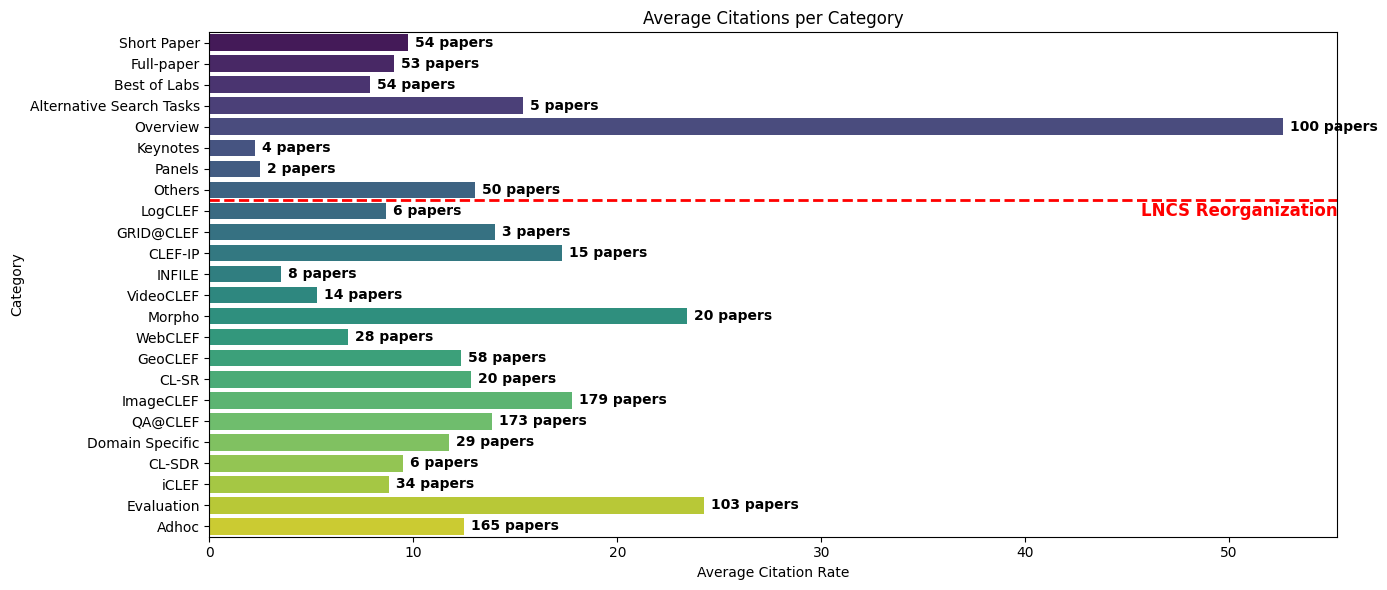

In [164]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

bars = sns.barplot(data=df_lncs_avg_cit, x='AvgCitations_semantic', y='Labs', ax=ax, palette='viridis')

for bar, (_, row) in zip(bars.patches, df_lncs_avg_cit.iterrows()):
    width = bar.get_width()
    label = f"{row['PaperCount']} papers"
    
    # Calculate the position for the annotation
    x = width
    y = bar.get_y() + bar.get_height() / 2
    
    # Add annotation above the bar with dynamic offset
    ax.annotate(label,
                (x, y),
                ha='left', va='center',  # Adjust alignment as needed
                xytext=(5, 0),  # Offset to the right of the bar
                textcoords='offset points',
                fontsize=10, color='black', weight='bold')
    
# Add a horizontal line to separate categories before and after 2010
ax.axhline(y=7.5, color='red', linestyle='--', linewidth=2, label=f'Separation Line at {separator_y:.2f}')

# Add a text label to the right side of the horizontal line
ax.text(x=df_lncs_avg_cit['AvgCitations_semantic'].max() - 7,  
        y=7.5 + 0.5,  
        s='LNCS Reorganization',  
        color='red', fontsize=12, weight='bold', ha='left', va='center')

ax.set_title('Average Citations per proceeding chapter category sorted by first appearance in LNCS proceedings')
ax.set_xlabel('Average Citation Rate')
ax.set_ylabel('Category')

plt.tight_layout()
plt.savefig('../../../images/lncs_best_categories.png', dpi=300)  
plt.show()

## TREC

In [222]:
track_assignments = pd.read_parquet("../../../data/Assign_tracks_by_ID_for_TREC.parquet")
df_trec = pd.merge(df_trec, track_assignments, how = "left", left_on="ID", right_on="ID")

In [223]:
def fill_empty_list(subclassification):
    if len(subclassification) == 0:
        return ["Overview"]
    return subclassification

df_trec['Tracks'] = df_trec['Tracks'].apply(fill_empty_list)

In [225]:
df_trec_exploded = df_trec.explode('Tracks')

In [226]:
df_trec_avg_cit = calculate_avg_citations(df_trec_exploded, "Tracks")

In [227]:
df_trec_avg_cit

,Tracks,AvgCitations_semantic,PaperCount
0,Blog,24.094118,88
1,CENTRE,5.000000,3
2,Chemical,7.800000,23
3,Clinical Decision Support,10.109375,69
4,Clinical Trials,0.960000,25
5,Common Core,8.550000,22
6,Complex Answer Retrieval,18.933333,17
7,Contextual Suggestion,6.103448,63
8,Conversational Assistance,4.769231,53
9,CrisisFACTs,0.800000,5


In [228]:
earliest_pub_year = df_trec_exploded.groupby('Tracks')['PubYear'].min().reset_index()
earliest_pub_year.columns = ['Tracks', 'EarliestPublicationYear']

In [230]:
df_trec_avg_cit = df_trec_avg_cit.merge(earliest_pub_year, on='Tracks')

In [231]:
# Sort the Tracks descending based on the earliest year of the underlying Track
df_trec_avg_cit = df_trec_avg_cit.sort_values(by='EarliestPublicationYear', ascending=False)

C:\Users\Andreas\AppData\Local\Temp\ipykernel_4152\4129268808.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=df_trec_avg_cit, x='AvgCitations_semantic', y='Tracks', ax=ax, palette='viridis')


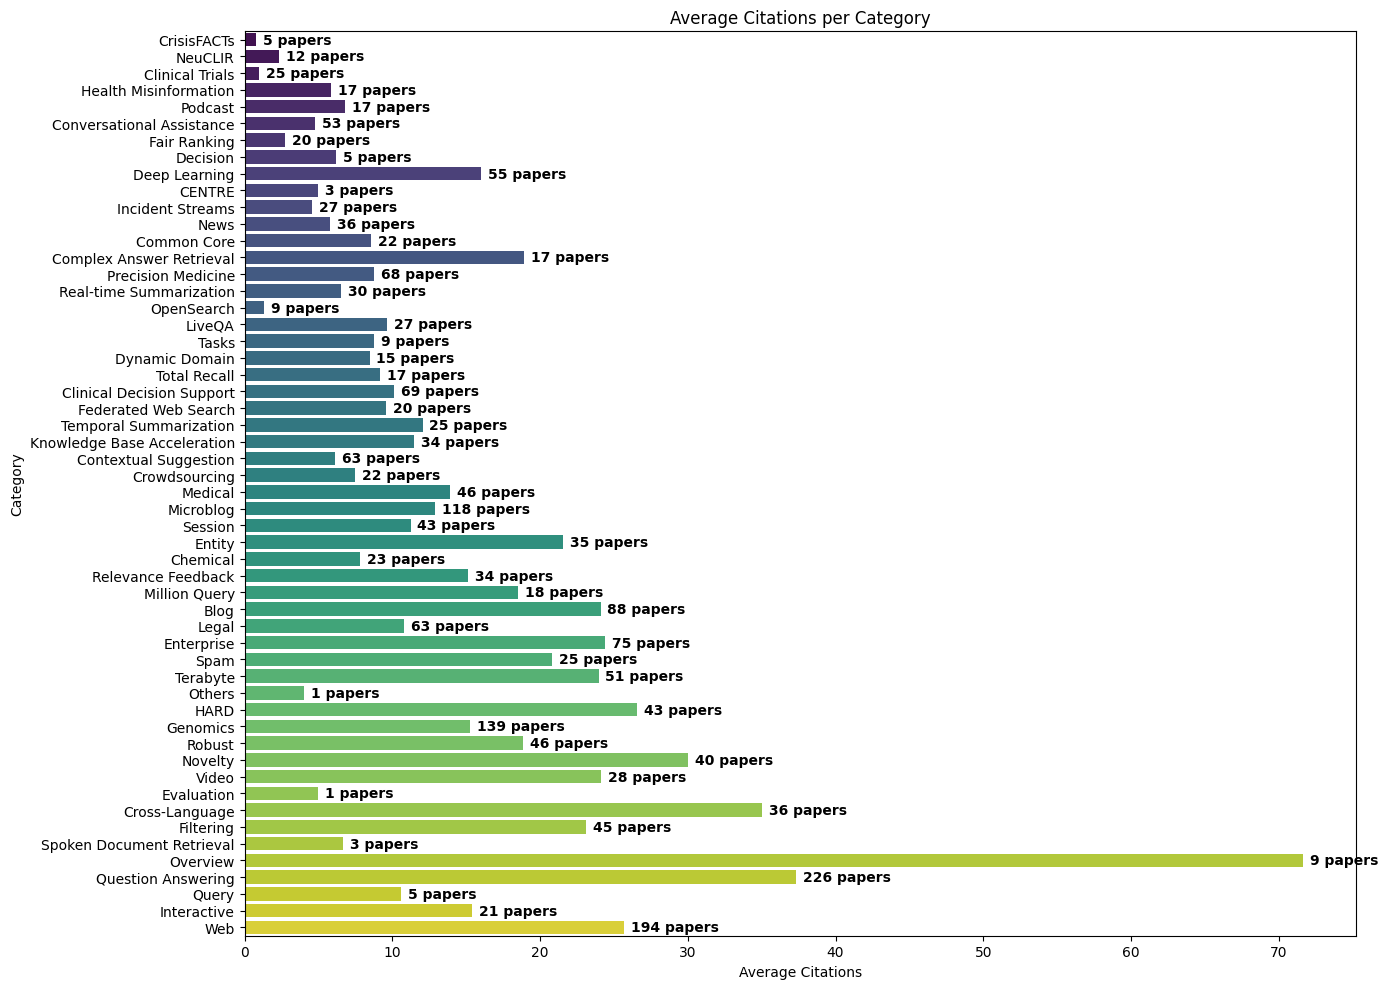

In [232]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

bars = sns.barplot(data=df_trec_avg_cit, x='AvgCitations_semantic', y='Tracks', ax=ax, palette='viridis')
ax.set_title('Average Citations per Track sorted by first appearance in TREC proceedings')
ax.set_xlabel('Average Citations')
ax.set_ylabel('Category')

for bar, (_, row) in zip(bars.patches, df_trec_avg_cit.iterrows()):
    width = bar.get_width()
    label = f"{row['PaperCount']} papers"
    
    # Calculate the position for the annotation
    x = width
    y = bar.get_y() + bar.get_height() / 2
    
    # Add annotation above the bar with dynamic offset
    ax.annotate(label,
                (x, y),
                ha='left', va='center', 
                xytext=(5, 0),  
                textcoords='offset points',
                fontsize=10, color='black', weight='bold')
    
plt.tight_layout()
plt.savefig('../../../images/trec_best_categories.png', dpi=300)  

plt.show()

## CEUR

In [234]:
# Read concordance dict to assign CLEF Lab names

with open('../../../data/abbreviations_CLEF_CEUR.json', 'r', encoding="utf-8") as file:
    matching_labs = json.load(file)

In [235]:
# Assign the Lab names based on the concordance dict

labs = []
for i,j in df_ceur.iterrows():
    assign_labs = []
    for k in matching_labs:
        for l in matching_labs[k]:
            if l in j["Section"]:
                assign_labs.append(k)
    labs.append(list(set(assign_labs)))

df_ceur["Labs"] = labs

In [237]:
df_ceur_exploded = df_ceur.explode('Labs')

In [238]:
df_ceur_avg_cit = calculate_avg_citations(df_ceur_exploded, "Labs")

In [239]:
earliest_pub_year = df_ceur_exploded.groupby('Labs')['PubYear'].min().reset_index()
earliest_pub_year.columns = ['Labs', 'EarliestPublicationYear']

In [240]:
df_ceur_avg_cit = df_ceur_avg_cit.merge(earliest_pub_year, on='Labs')

In [241]:
# Sort the Labs descending based on the earliest year of the underlying lab
df_ceur_avg_cit = df_ceur_avg_cit.sort_values(by='EarliestPublicationYear', ascending=False)

C:\Users\Andreas\AppData\Local\Temp\ipykernel_4152\717969730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=df_ceur_avg_cit, x='AvgCitations_semantic', y='Labs', ax=ax, palette='viridis')


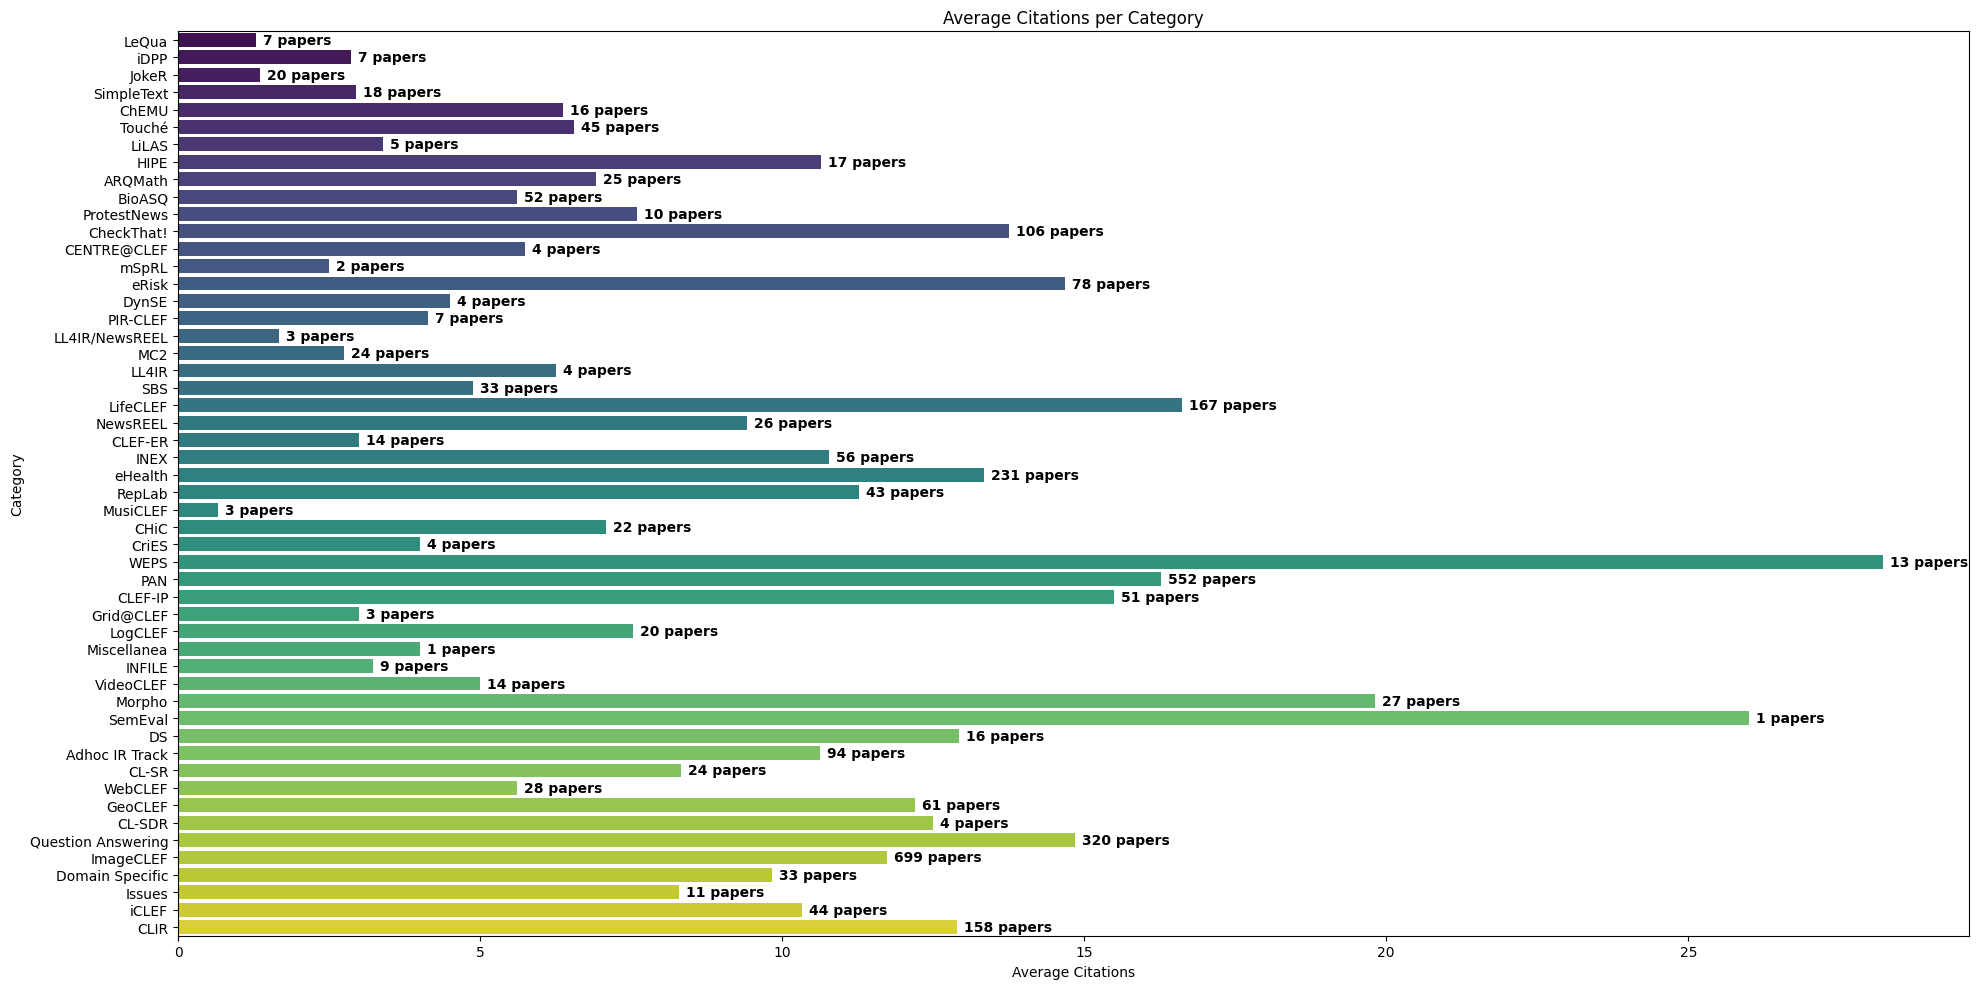

In [242]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

bars = sns.barplot(data=df_ceur_avg_cit, x='AvgCitations_semantic', y='Labs', ax=ax, palette='viridis')
ax.set_title('Average Citations per Lab sorted by first appearance in CEUR proceedings')
ax.set_xlabel('Average Citations')
ax.set_ylabel('Category')

for bar, (_, row) in zip(bars.patches, df_ceur_avg_cit.iterrows()):
    width = bar.get_width()
    label = f"{row['PaperCount']} papers"
    
    # Calculate the position for the annotation
    x = width
    y = bar.get_y() + bar.get_height() / 2
    
    # Add annotation above the bar with dynamic offset
    ax.annotate(label,
                (x, y),
                ha='left', va='center',  
                xytext=(5, 0),  
                textcoords='offset points',
                fontsize=10, color='black', weight='bold')
    

plt.tight_layout()
plt.savefig('../../../images/ceur_best_categories.png', dpi=300)  

plt.show()

# Relative cumulative citation count for each quartile

In [274]:
import numpy as np
def calculate_cumulative_shares(df):
    df = df.sort_values(by='Citations_semantic', ascending=False).reset_index(drop=True)
    total_citations = df['Citations_semantic'].sum()
    num_papers = len(df)
    
    # Calculation of the cumulative shares
    groups = [0.25, 0.50, 0.75, 1.00]
    cumulative_shares = []
    
    for group in groups:
        top_n_papers = int(np.ceil(num_papers * group))
        citations_in_group = df.iloc[:top_n_papers]['Citations_semantic'].sum()
        cumulative_shares.append(citations_in_group / total_citations)
    return cumulative_shares

## Plot for LNCS

In [282]:
cumulative_shares = calculate_cumulative_shares(df_lncs)
summary = []

for year, group in df_lncs.groupby('PubYear'):
    cumulative_shares = calculate_cumulative_shares(group)
    summary.append([year] + cumulative_shares)

summary_df = pd.DataFrame(summary, columns=['PubYear', 'Top 25%', 'Top 50%', 'Top 75%', 'Top 100%'])
summary_df.set_index('PubYear', inplace=True)

summary_df['Top 25%'] = summary_df['Top 25%']
summary_df['25%-50%'] = summary_df['Top 50%'] - summary_df['Top 25%']
summary_df['50%-75%'] = summary_df['Top 75%'] - summary_df['Top 50%']
summary_df['75%-100%'] = summary_df['Top 100%'] - summary_df['Top 75%']
summary_df = summary_df.drop(columns=['Top 50%', 'Top 75%', 'Top 100%'])

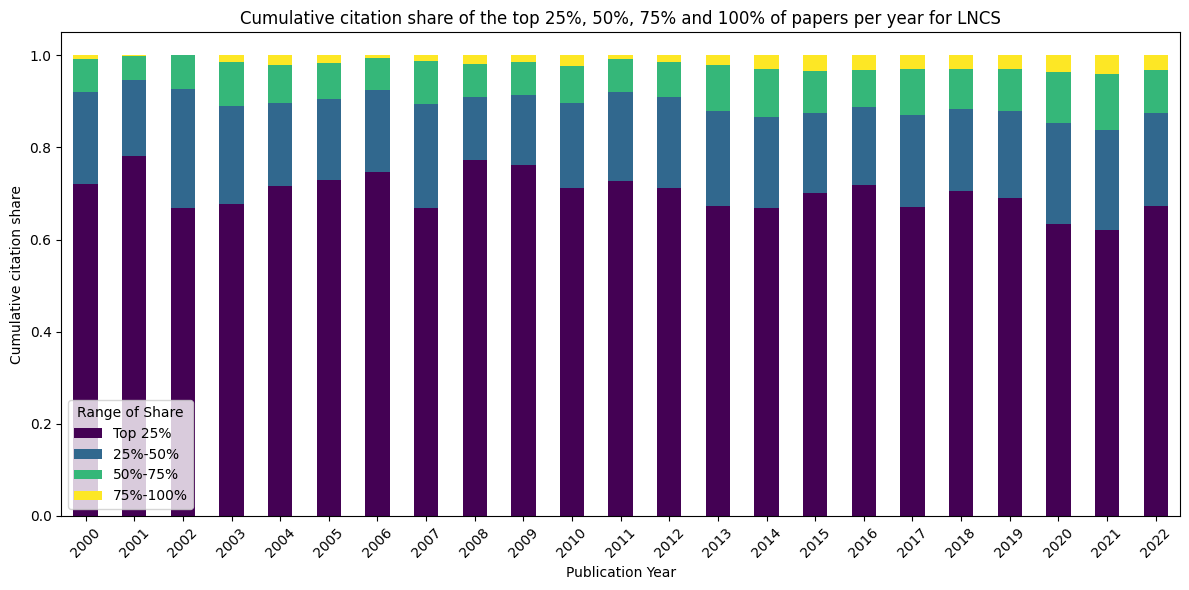

In [290]:
summary_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Cumulative citation share of the top 25%, 50%, 75% and 100% of papers per year for LNCS')
plt.xlabel('Publication Year')
plt.xticks(rotation=45)
plt.ylabel('Cumulative citation share')
plt.legend(title='Range of Share')
plt.tight_layout()
plt.savefig('../../../images/cumulative_citation_share_lncs.png', dpi=300) 
plt.show()

## Plot for TREC

In [285]:
cumulative_shares = calculate_cumulative_shares(df_trec)
summary = []

for year, group in df_trec.groupby('PubYear'):
    cumulative_shares = calculate_cumulative_shares(group)
    summary.append([year] + cumulative_shares)

summary_df = pd.DataFrame(summary, columns=['PubYear', 'Top 25%', 'Top 50%', 'Top 75%', 'Top 100%'])
summary_df.set_index('PubYear', inplace=True)

summary_df['Top 25%'] = summary_df['Top 25%']
summary_df['25%-50%'] = summary_df['Top 50%'] - summary_df['Top 25%']
summary_df['50%-75%'] = summary_df['Top 75%'] - summary_df['Top 50%']
summary_df['75%-100%'] = summary_df['Top 100%'] - summary_df['Top 75%']
summary_df = summary_df.drop(columns=['Top 50%', 'Top 75%', 'Top 100%'])

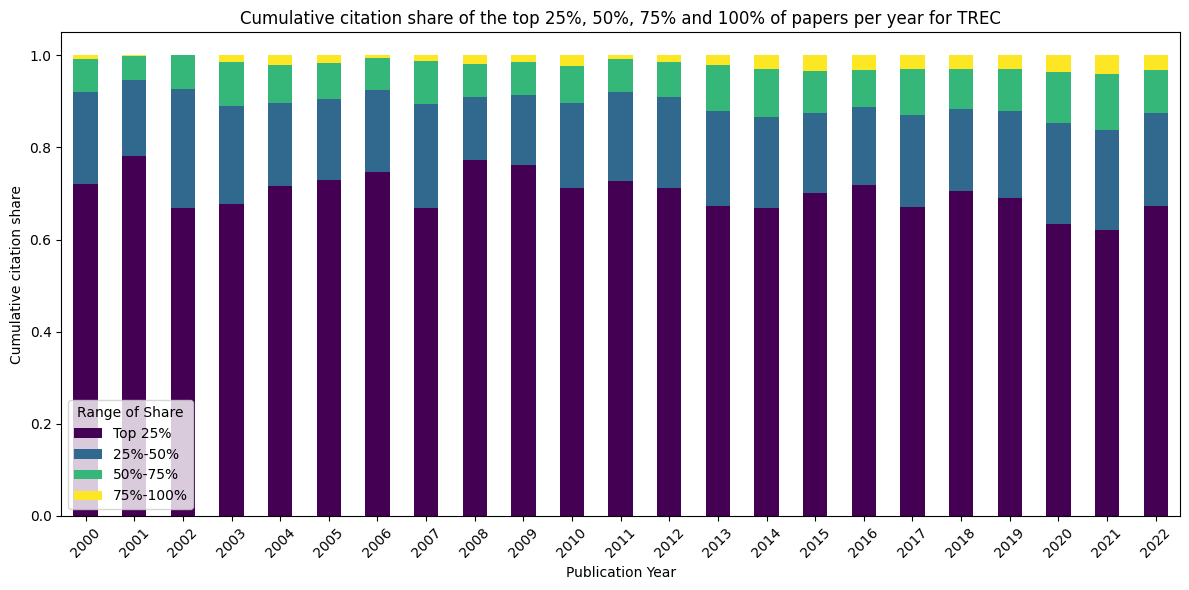

In [291]:
summary_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Cumulative citation share of the top 25%, 50%, 75% and 100% of papers per year for TREC')
plt.xlabel('Publication Year')
plt.xticks(rotation=45)
plt.ylabel('Cumulative citation share')
plt.legend(title='Range of Share')
plt.tight_layout()
plt.savefig('../../../images/cumulative_citation_share_trec.png', dpi=300)  
plt.show()

## Plot for CEUR

In [288]:
cumulative_shares = calculate_cumulative_shares(df_ceur)
summary = []

for year, group in df_ceur.groupby('PubYear'):
    cumulative_shares = calculate_cumulative_shares(group)
    summary.append([year] + cumulative_shares)

summary_df = pd.DataFrame(summary, columns=['PubYear', 'Top 25%', 'Top 50%', 'Top 75%', 'Top 100%'])
summary_df.set_index('PubYear', inplace=True)

summary_df['Top 25%'] = summary_df['Top 25%']
summary_df['25%-50%'] = summary_df['Top 50%'] - summary_df['Top 25%']
summary_df['50%-75%'] = summary_df['Top 75%'] - summary_df['Top 50%']
summary_df['75%-100%'] = summary_df['Top 100%'] - summary_df['Top 75%']
summary_df = summary_df.drop(columns=['Top 50%', 'Top 75%', 'Top 100%'])

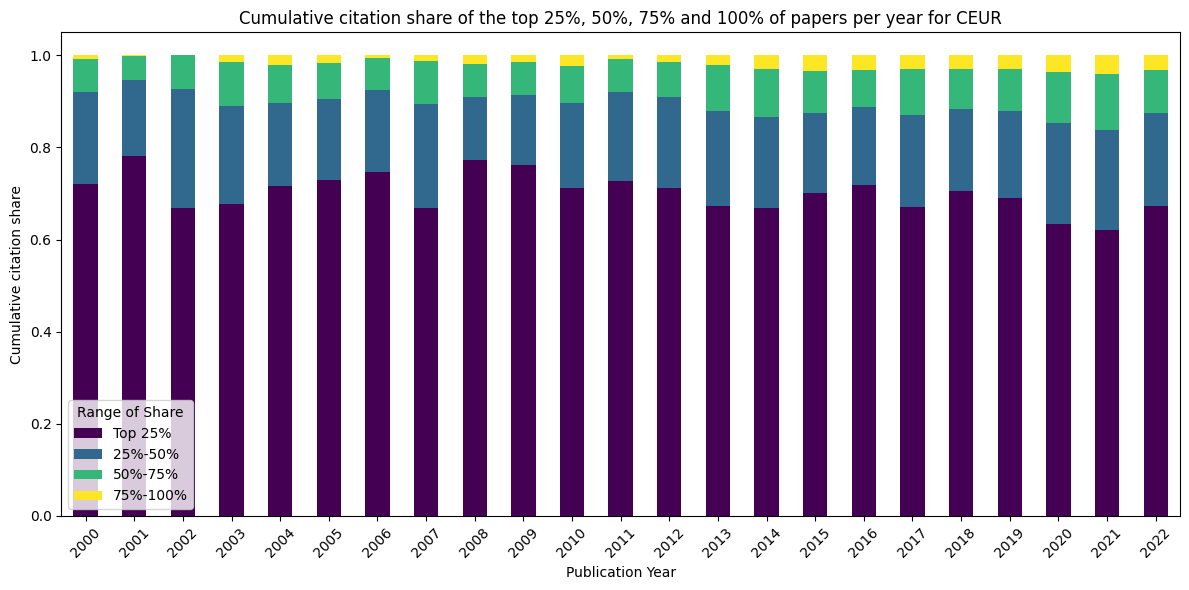

In [292]:
summary_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Cumulative citation share of the top 25%, 50%, 75% and 100% of papers per year for CEUR')
plt.xlabel('Publication Year')
plt.xticks(rotation=45)
plt.ylabel('Cumulative citation share')
plt.legend(title='Range of Share')
plt.tight_layout()
plt.savefig('../../../images/cumulative_citation_share_ceur.png', dpi=300)  
plt.show()